# **Optimizing Apartment Prices in the Daegu Area, South Korea using Machine Learning Analysis**

# **Outline**

## **Background**

**Daegu** is the 4th largest metropolitan area in South Korea, and is officially called Daegu Metropolitan City. According to data released by the Korea Ministry of Land, Infrastructure, Transport and Tourism, the volume of housing transactions in regional cities such as **Daegu**, Ulsan and Daejeon doubled last month (**July**) compared to the beginning of the year (**2023**). In Daegu, apartment transactions reached **1,890** units in the past month, up **111%** from January’s **895** units.

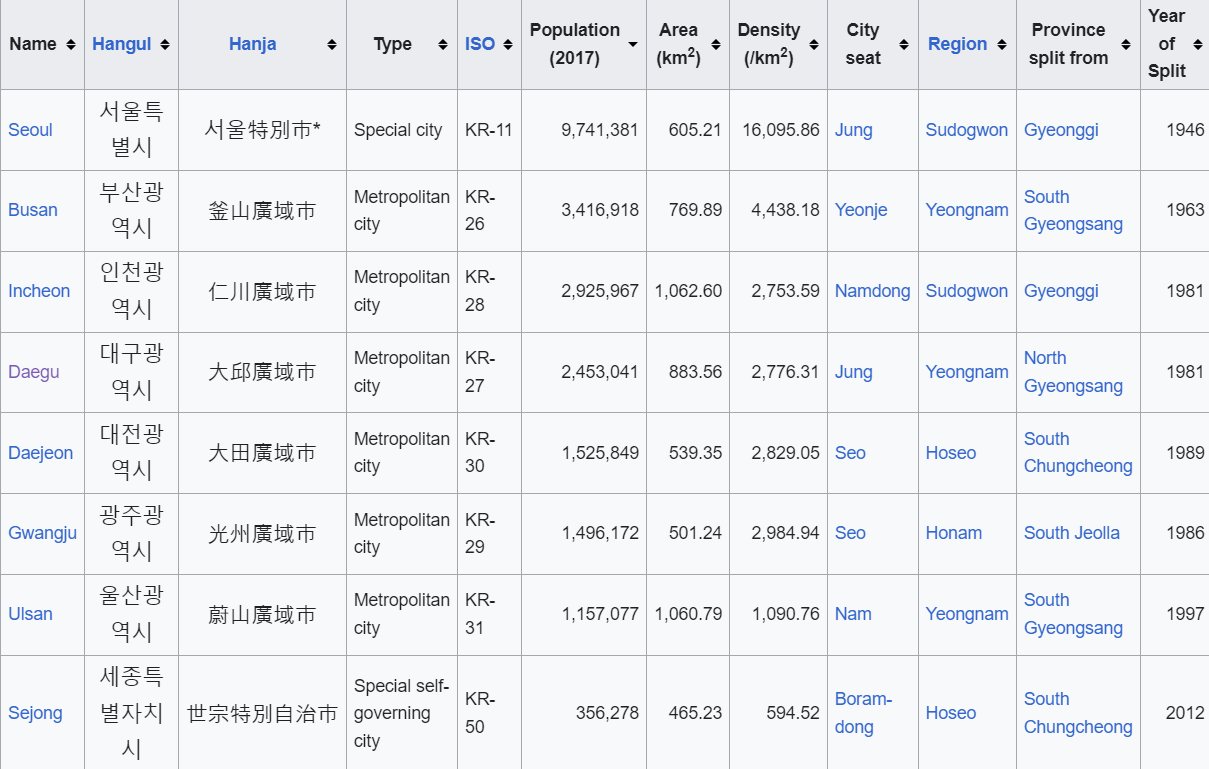

As transaction volume increases, **real estate prices also increase**. According to the weekly housing price trend as of 21 August 2023, announced by the Korea Real Estate Corporation, housing prices in **Daegu**, Ulsan, and Daejeon all increased by **0.06%**, the highest rate of increase among local metropolitan areas. as one example, in Daegu's Jung-gu city, a **153 square meter apartment sold for 785 million won on August 1**.

Based on **CEIC data**, the average number of apartment transactions in Daegu reached **4,494 units from January 2006 to June 2018** with 150 observations, this is quite a high figure. This data reached a record high of **10,752** transactions in June 2013. This can happen because **Daegu's strategic location in the heart of South Korea**, its focus on innovation and technology, and the rise of the education and health industries make it a prime place to live. areas such as Suseong-gu and Dong-gu have become very popular due to their central location, access to amenities, and ongoing development projects.

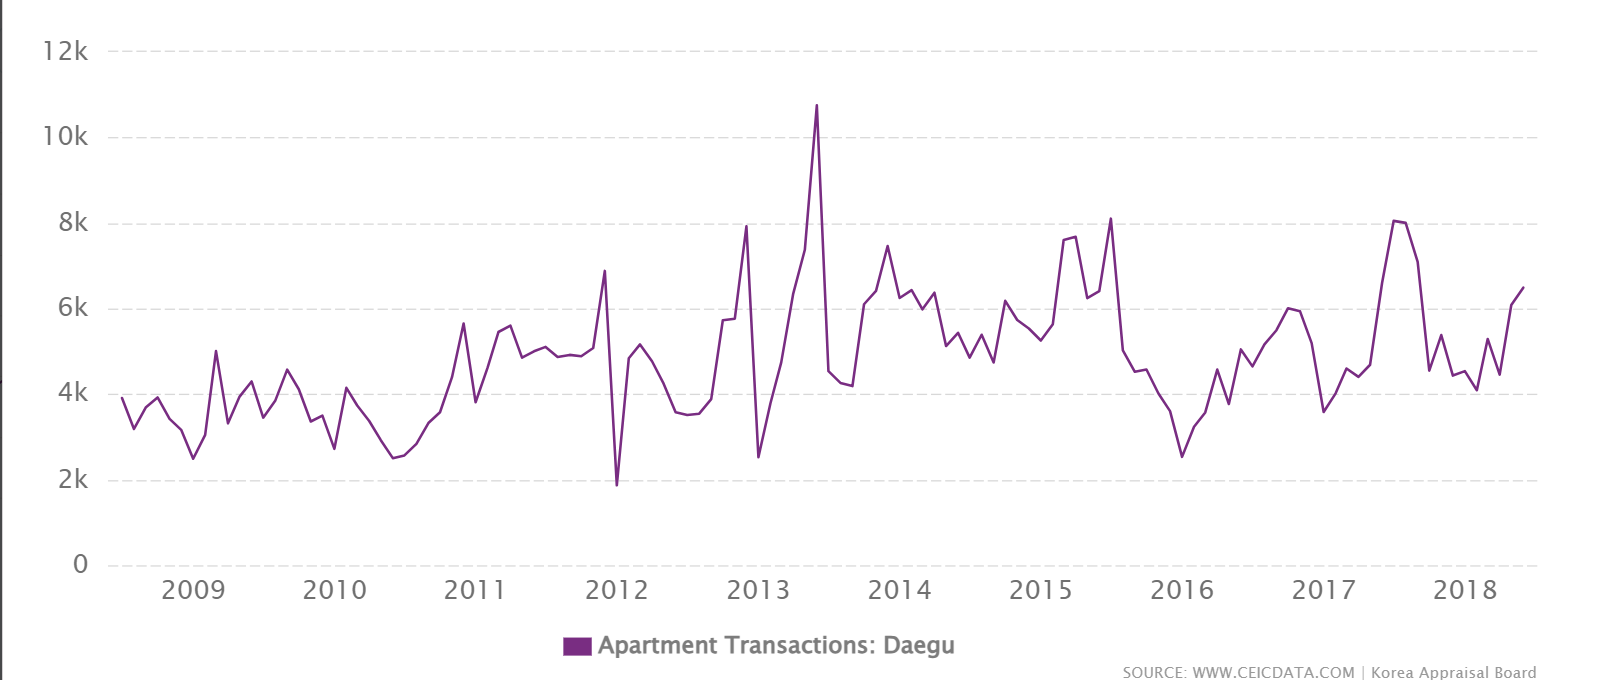

Apart from that, the **share of housing in Daegu**, South Korea in 2021 based on type is **dominated by apartments** (57.4%). Seeing how profitable it is to invest in housing (especially apartments), knowing what factors can influence the selling price of apartments in Daegu is very important for property owners or real estate agents in order to increase the attractiveness of potential buyers and get maximum profits.

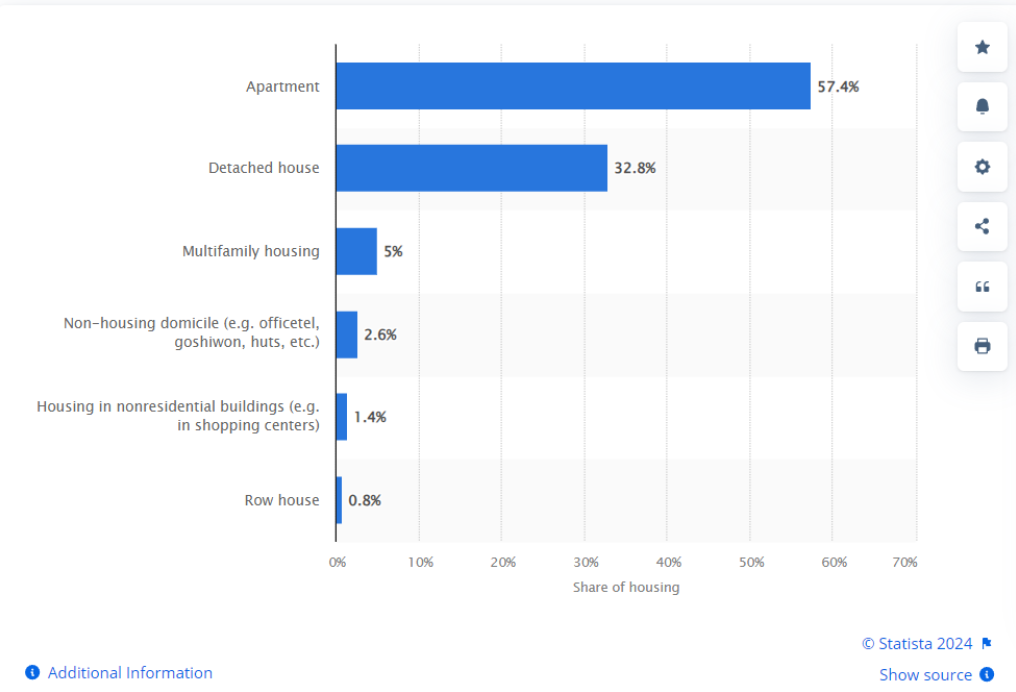

**Source:**
- https://www.ceicdata.com/en/korea/apartment-transactions/apartment-transactions-daegu
- https://pulsenews.co.kr/view.php?year=2023&no=655271
- https://blog.kurby.ai/the-evolution-of-daegu-south-koreas-real-estate-market-over-the-last-decade/
- https://www.statista.com/statistics/1185119/south-korea-housing-types-daegu/
- https://id.wikipedia.org/wiki/Daegu
- https://en.wikipedia.org/wiki/List_of_provincial-level_cities_of_South_Korea#Position_in_hierarchy_and_types

----------------------------

## **Problem Statement**

Some real estate agents and property owners have **difficulty determining the optimal price for the apartment they want to sell**. This is because there are many factors that must be considered in determining the right price, such as investing in areas where development factors are favorable, such as subway stations that pass through popular areas, land value, floor area ratio, etc. **Accuracy** in determining prices is very important to maintain a balance between profits and market attractiveness.

**Source:**
- https://eightify.app/summary/economics-and-politics/korea-s-housing-market-decline-and-potential-for-future-increase

----------------------------

## **Goals**

The aim of this project is to create a predictive model using Machine Learning Algorithms to determine the appropriate selling price for an apartment based on the characteristics of the apartment itself (land area, distance to the station, year built, etc.). This model is expected to help stakeholders make the right decisions regarding prices, investment and property development.

----------------------------

## **Analytical Approach**

This research will involve several features in an apartment and will look at their relationship with the price of the apartment itself. Because the target of this research is **numerically continuous apartment prices, a regression analysis approach will be used**. This model will use apartment features as predictors to estimate the selling price.

----------------------------

## **Evaluation Metrics**

Regression Models can be evaluated using Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Root Mean Squared Error (RMSE). This metric focuses on errors and provides insight into the accuracy of predictions, with lower evaluation values indicating a more accurate model. Apart from these metrics, the regression model can also be measured using R-Squared to see the proportion of variance explained by the model.

| Metrics | What | Why | When| Example |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| MAE | Average absolute difference between estimated and actual values. | Less sensitive to outliers. | With many outliers or non-normal residuals. | in house pricing, if you’re off by 20.000 or 40.000, MAE treats these errors linearly (without considering their direction). |
| MAPE | Percentage error between estimated and actual values. | Easy interpretation as a percentage. | For forecasting and percentage-based error analysis. | For instance, if a house is worth 200.000 and your predict 180.000, the error is 10%. |
| RMSE | Square root of MSE, in same units as response variable. | Easier interpretation of errors. | When error scale should match target scale. | if RMSE is 20.000 it means the typical prediction error of the price is about 20.000. |
| R-Squared | Proportion of variance explained by the model. | Indicates model’s explanatory power. | To evaluate linear regression models’ fit. | in predicting house prices, a high R-Squared would indicate that your model captures most of the variability in house prices. |

----------------------------

## **Limitation**

- This model can only predict apartment prices in Daegu city, and cannot be used as a benchmark for prices in other areas.
- This model only uses data at one time, it cannot forecast prices in the future, because there could be changes in trends at times in the future.
- This model only considers the features in the dataset and cannot capture phenomena outside of the existing features, especially social, cultural and governmental factors.

# **Data**

## *Data Dictionary*

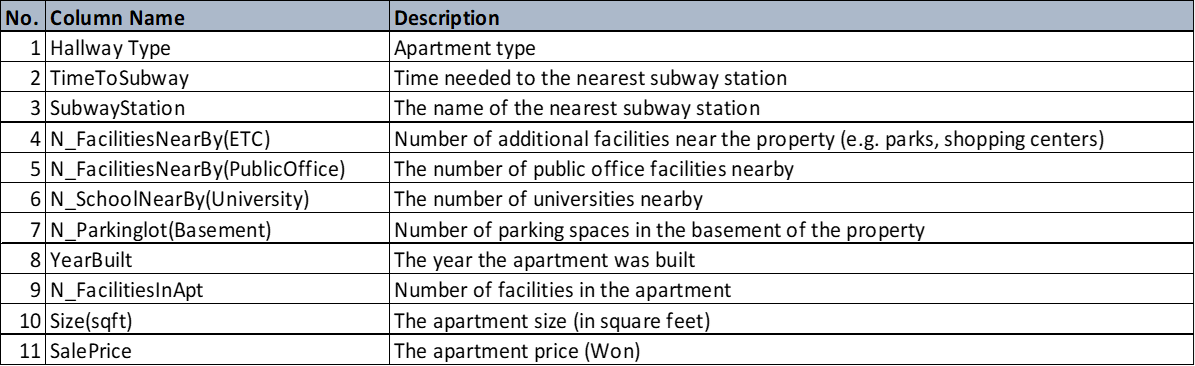

## *Data Understanding*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [3]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [4]:
df.duplicated().sum()

1422

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [6]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [7]:
df.describe(include='object')

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


### **Summary**

In [8]:
import numpy as np
import pandas as pd
from scipy import stats

# Fungsi untuk menghitung persentase outliers
def calculate_outlier_percentage(column):
    if column.dtype in [np.float64, np.int64]:
        z_scores = np.abs(stats.zscore(column.dropna()))  # Menghitung skor Z, mengabaikan nilai NaN
        return np.sum(z_scores > 3) / len(column) * 100  # Menghitung persentase outliers
    return 0

# Membuat DataFrame dengan informasi yang diinginkan
df_info = pd.DataFrame({
    'Features'           : df.columns.values,
    'Data Type'         : df.dtypes.values,
    'Null Value (%)'     : df.isna().mean().values * 100,
    'Unique Value'          : df.nunique().values,
    'Duplicate Data'         : df.duplicated().sum(),
    'Negative Value': [len(df[col][df[col] < 0]) / len(df) * 100 
                           if col in df.select_dtypes(include=np.number).columns else 0 
                           for col in df.columns],
    'Outlier(%)'        : [calculate_outlier_percentage(df[col]) for col in df.columns],
    'Unique Sample'     : [df[col].unique() for col in df.columns]
}).round(3)

df_info

,Features,Data Type,Null Value (%),Unique Value,Duplicate Data,Negative Value,Outlier(%),Unique Sample
0,HallwayType,object,0.0,3,1422,0.0,0.000,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,5,1422,0.0,0.000,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,8,1422,0.0,0.000,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0.0,4,1422,0.0,0.000,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,8,1422,0.0,0.000,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,6,1422,0.0,0.000,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,20,1422,0.0,0.000,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0.0,16,1422,0.0,0.000,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,9,1422,0.0,0.000,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,89,1422,0.0,0.703,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


This table is a brief summary of the data in each column of the dataset.

- **Data Types**: There are numeric (int64 & float64) and categorical (object) data types.
- **Null Values**: No columns have null values in this dataset
- **Unique Values**: See how many unique values there are in a column
- **Duplicate Data**: There are 1422 rows of data which are duplicates. We will examine this duplicate data further, so that there is no bias in the final results.
- **Negative Values**: There is no negative data in this data set
- **Outliers**: There are outliers in the Size (sqf) and Selling Price columns. Even though the percentage is very small (less than 1%), we will still look at the outlier data further.

In general, this dataset can be said to be quite good because there are not too many data problems that need to be handled.

# **Handling Data Anomalies**

## *Duplicated Data*

- If you use the **`duplicated()`** function in pandas without specifying a subset, it considers all columns. **A row is marked as duplicated only if all its column values are identical to those of another row**.
- Duplicate data can have **detrimental effects** on machine learning models and outcomes, such as **reducing data diversity and representativeness**, which can lead to *overfitting* or *biased models*.
- Therefore, it is best to **eliminate data that has duplicates**

In [9]:
# dulicate data, all column must be unique
df[df.duplicated()].sort_values(by=['SubwayStation', 'SalePrice'])

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
3824,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,72256
4080,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,72654
2768,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73008
1203,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73053
1436,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,73053
...,...,...,...,...,...,...,...,...,...,...,...
2598,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,392035
2793,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805
3048,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805
3562,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,393805


In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


## *Outliers Data*

- It is important to find outliers and remove them from the dataset as part of the feature engineering before training machine learning algorithms for predictive modeling.
- Outliers present in a classification or regression dataset can lead to lower predictive modeling performance.

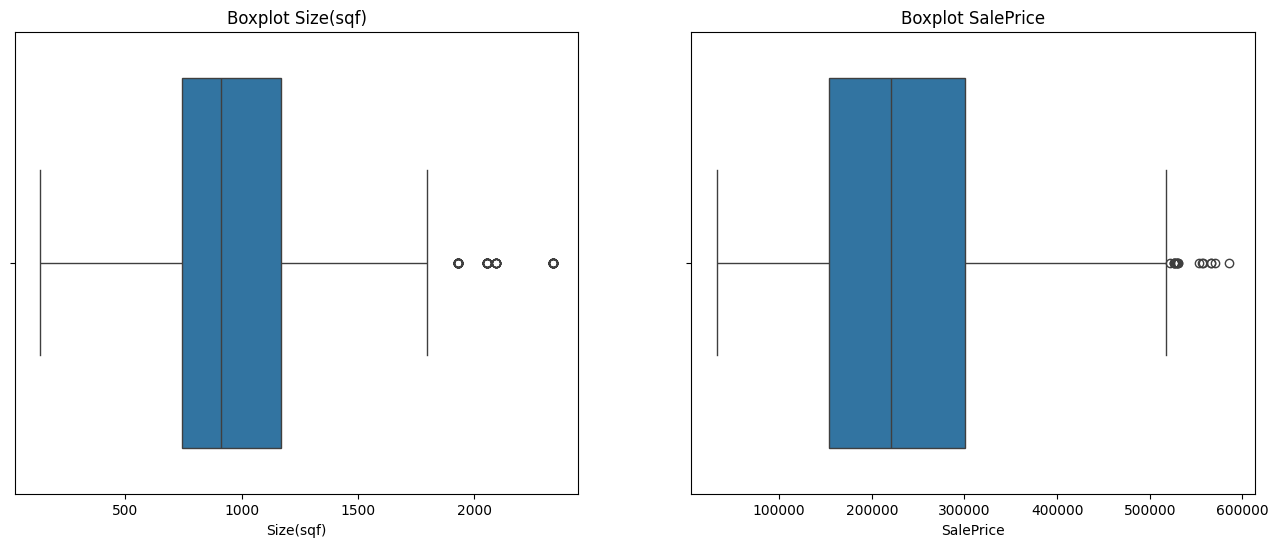

In [13]:
plt.figure(figsize=(16, 6))

# Create the first subplot for 'Size(sqf)'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
sns.boxplot(x='Size(sqf)', data=df)
plt.title('Boxplot Size(sqf)')

# Create the second subplot for 'SalePrice'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
sns.boxplot(x='SalePrice', data=df)
plt.title('Boxplot SalePrice')

plt.show()

In [14]:
# outliers Size(sqf)
Q1 = df['Size(sqf)'].quantile(0.25)
Q3 = df['Size(sqf)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_size = Q1 - (1.5 * IQR)
upper_bound_size = Q3 + (1.5 * IQR)

outliers_upper_size = df[df['Size(sqf)'] >= upper_bound_size]
outliers_lower_size = df[df['Size(sqf)'] <= lower_bound_size]

print('Lower bound:', lower_bound_size)
print('Upper bound:', upper_bound_size)

print('Number of outliers:', len(outliers_upper_size) + len(outliers_lower_size))

Lower bound: 107.0
Upper bound: 1803.0
Number of outliers: 84


In [15]:
# outliers SalePrice
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound_sale = Q1 - (1.5 * IQR)
upper_bound_sale = Q3 + (1.5 * IQR)

outliers_upper_sale = df[df['SalePrice'] >= upper_bound_sale]
outliers_lower_sale = df[df['SalePrice'] <= lower_bound_sale]

print('Lower bound:', lower_bound_sale)
print('Upper bound:', upper_bound_sale)

print('Number of outliers:', len(outliers_upper_sale) + len(outliers_lower_sale))

Lower bound: -67478.5
Upper bound: 521901.5
Number of outliers: 17


In [16]:
# outlier percentage
outlier_size_percentage = (len(outliers_upper_size) + len(outliers_lower_size)) / len(df) * 100
outlier_sale_percentage = (len(outliers_upper_sale) + len(outliers_lower_sale)) / len(df) * 100

print('Outlier percentage Size(sqf):', outlier_size_percentage)
print('Outlier percentage SalePrice:', outlier_sale_percentage)


Outlier percentage Size(sqf): 3.109959274342836
Outlier percentage SalePrice: 0.6293965198074787


- Since the percentage of outliers is not very large (below 5%), we will not include the outlier data when training the model.

In [17]:
# Remove outliers
df_no_outliers = df[(df['Size(sqf)'] >= lower_bound_size) & (df['Size(sqf)'] <= upper_bound_size) &
                    (df['SalePrice'] >= lower_bound_sale) & (df['SalePrice'] <= upper_bound_sale)]

df_no_outliers

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


# **Feature Engineering**
In this dataset, we will divide the features into several categories based on the characteristics of the data. The purpose of doing this is to make it easier when you want to do feature engineering.

- **Numeric features**: ('Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt')
- **Categorical features**: ('HallwayType', 'SubwayStation')
- **Ordinal features**: ('TimeToSubway')

`YearBuilt` will be left alone (passthrough) because this data already has its own meaning and order based on year & more than that the data is discrete, only having 16 unique count values.

In [18]:
df_no_outliers['YearBuilt'].nunique()

16

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import OrdinalEncoder as ce_OrdinalEncoder

In [20]:
df_no_outliers['HallwayType'].unique()

array(['terraced', 'mixed', 'corridor'], dtype=object)

In [21]:
df_no_outliers['SubwayStation'].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [22]:
df_no_outliers['TimeToSubway'].value_counts()

TimeToSubway
0-5min                1190
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: count, dtype: int64

In [23]:
df_no_outliers.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [24]:
# Seperating features by its data types
numeric_features = ['Size(sqf)', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 
                    'N_Parkinglot(Basement)', 'N_FacilitiesInApt']
categorical_features = ['HallwayType', 'SubwayStation']
ordinal_features = ['TimeToSubway']

# Mapping for ordinal encoders (TimeToSubway)
ordinal_map_subway = [{'col':'TimeToSubway',
                'mapping':{'no_bus_stop_nearby':1, 
                           '15min~20min':2, 
                           '10min~15min':3, 
                           '5min~10min':4,
                           '0-5min':5}}]                           

# Preprocessor for encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord', ce_OrdinalEncoder(mapping=ordinal_map_subway), ordinal_features)
    ],
    remainder='passthrough'
)

# Pipeline for feature engineering
FE_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

FE_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['Size(sqf)',
                                                   'N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_Parkinglot(Basement)',
                                                   'N_FacilitiesInApt']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'SubwayStation']),
                                                 ('ord',
                                                  OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': no_bus_stop_nearby    1
15min~20min           2
10min~15min           3
5min~10min            4
0-5min                5
dtype: int64}]),
                                                  ['TimeToSubway'])]))])

In [25]:
#make pipeline dataframe
df_transformed = pd.DataFrame(FE_pipeline.fit_transform(df_no_outliers))
df_transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.174877,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0,346017.0
1,0.009852,0.0,0.5,-0.5,-0.868720,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1986.0,150442.0
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0,61946.0
3,0.009852,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0,165486.0
4,2.051724,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,311504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,-0.226601,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,290265.0
2607,2.096059,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,345132.0
2608,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0,323008.0
2609,1.332512,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,242477.0


In [26]:
#rename columns after transformation
FE_pipeline.named_steps['preprocessor'].transformers_

[('num',
  RobustScaler(),
  ['Size(sqf)',
   'N_FacilitiesNearBy(ETC)',
   'N_FacilitiesNearBy(PublicOffice)',
   'N_SchoolNearBy(University)',
   'N_Parkinglot(Basement)',
   'N_FacilitiesInApt']),
 ('cat',
  OneHotEncoder(handle_unknown='ignore'),
  ['HallwayType', 'SubwayStation']),
 ('ord',
  OrdinalEncoder(cols=['TimeToSubway'],
                 mapping=[{'col': 'TimeToSubway', 'data_type': dtype('O'),
                           'mapping': no_bus_stop_nearby    1
  15min~20min           2
  10min~15min           3
  5min~10min            4
  0-5min                5
  dtype: int64}]),
  ['TimeToSubway']),
 ('remainder', 'passthrough', [7, 10])]

In [27]:
# Numeric features
FE_pipeline.named_steps['preprocessor'].transformers_[0][2]

['Size(sqf)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'N_FacilitiesInApt']

In [28]:
# Categorical features
FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

array(['HallwayType_corridor', 'HallwayType_mixed',
       'HallwayType_terraced', 'SubwayStation_Bangoge',
       'SubwayStation_Banwoldang', 'SubwayStation_Chil-sung-market',
       'SubwayStation_Daegu', 'SubwayStation_Kyungbuk_uni_hospital',
       'SubwayStation_Myung-duk', 'SubwayStation_Sin-nam',
       'SubwayStation_no_subway_nearby'], dtype=object)

In [29]:
# Ordinal features Subway
FE_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(ordinal_features)

array(['TimeToSubway'], dtype=object)

In [30]:
# Remaining features
remaining_columns = df_no_outliers.drop(numeric_features + categorical_features + ordinal_features, axis=1).columns
remaining_columns

Index(['YearBuilt', 'SalePrice'], dtype='object')

In [31]:
# Combine all features
all_features = list(FE_pipeline.named_steps['preprocessor'].transformers_[0][2]) + \
                list(FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + \
                list(FE_pipeline.named_steps['preprocessor'].transformers_[2][1].get_feature_names_out(ordinal_features)) + \
                list(remaining_columns)
                
df_transformed.columns = all_features
df_transformed

,Size(sqf),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToSubway,YearBuilt,SalePrice
0,1.174877,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0,346017.0
1,0.009852,0.0,0.5,-0.5,-0.868720,-0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1986.0,150442.0
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0,61946.0
3,0.009852,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0,165486.0
4,2.051724,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,311504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,-0.226601,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0,290265.0
2607,2.096059,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,345132.0
2608,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0,323008.0
2609,1.332512,0.8,1.0,1.5,0.000000,-0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1993.0,242477.0


In [32]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Size(sqf)                            2611 non-null   float64
 1   N_FacilitiesNearBy(ETC)              2611 non-null   float64
 2   N_FacilitiesNearBy(PublicOffice)     2611 non-null   float64
 3   N_SchoolNearBy(University)           2611 non-null   float64
 4   N_Parkinglot(Basement)               2611 non-null   float64
 5   N_FacilitiesInApt                    2611 non-null   float64
 6   HallwayType_corridor                 2611 non-null   float64
 7   HallwayType_mixed                    2611 non-null   float64
 8   HallwayType_terraced                 2611 non-null   float64
 9   SubwayStation_Bangoge                2611 non-null   float64
 10  SubwayStation_Banwoldang             2611 non-null   float64
 11  SubwayStation_Chil-sung-market

Feature Engineering is the process of creating new features or changing existing features with the aim of improving model performance. The Feature Engineering process in this project uses the Pipeline library and the description is as follows:

- **RobustScaler**: `Robust Scaler` is a feature scaling technique based on statistics that is less sensitive to outliers (median and interquartile range) and is commonly used for numeric features. This scaling helps the model from being affected by extreme values that might bias/misinterpret the model.
- **OneHotEncoder**: `OneHotEncoder` is used to convert categorical variables into a series of binary variables (numerical 1 or 0) or can also be called dummy variables. The goal is to facilitate the processing of categorical information without assuming order between (nominal) categories.
- **OrdinalEncoder**: `OrdinalEncoder` translates values such as 'TimeToSubway' into an ordinal numerical scale according to a predefined mapping. Ordinal features are category features that have a sequence or level.
- **Passthrough**: `passthorugh` is used to ignore features that you do not want to change (in pre-processing) because these features are already considered suitable for the model to be run. In this model we leave the `YearBuilt` column as is.

# **Splitting Data**

Next, we will divide the dataset and divide it into 2 parts, that is the training set and the test set. This is done so that we can distinguish which data the model uses to learn and which data the model uses to make predictions. Apart from that, splitting data will be very useful because it aims to avoid information leakage.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

In [36]:
X_train

,Size(sqf),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,SubwayStation_Bangoge,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,TimeToSubway,YearBuilt
2,-0.866995,0.0,1.5,0.5,-0.777958,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1997.0
657,-0.103448,-0.2,-0.5,0.0,1.189627,1.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2007.0
854,0.475369,-0.2,-1.0,0.0,-0.019449,-0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2015,0.588670,-0.2,-1.5,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2006.0
862,-0.411330,0.8,0.5,1.0,0.424635,0.666667,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,0.000000,0.0,-1.0,0.0,-0.570502,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,2006.0
1768,-0.199507,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0
1737,0.000000,0.8,1.5,1.5,1.034036,1.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2014.0
1209,0.009852,-0.2,-0.5,0.0,-0.098865,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,2008.0


In [37]:
y_train

2        61946.0
657     322123.0
854     209911.0
2015    267256.0
862     124778.0
          ...   
1092    176991.0
1768    161504.0
1737    353982.0
1209    315929.0
641     143362.0
Name: SalePrice, Length: 1958, dtype: float64

# **Modeling (Base Model Compare)**

The Regression Algorithm that will be used to compare models is:

- Linear regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- KNN Regressor
- Random Forest
- Support Vector Regressor

Among the 7 algorithms, we will look for 2 algorithm that produces the best evaluation metrics, then we will tune the model.

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

In [39]:
# define function for model evaluation

def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, train_preds)
    mae_test = mean_absolute_error(y_test, test_preds)
    
    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)
    
    mape_train = mean_absolute_percentage_error(y_train, train_preds)
    mape_test = mean_absolute_percentage_error(y_test, test_preds)
    
    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    rmse_test = mean_squared_error(y_test, test_preds, squared=False)
    
    # Save the results and create a dataframe
    data = {
        'Training R^2': r2_train,
        'Test R^2': r2_test,
        'Training MAE': mae_train,
        'Test MAE': mae_test,
        'Training MAPE': mape_train,
        'Test MAPE': mape_test,
        'Training RMSE': rmse_train,
        'Test RMSE': rmse_test
    }
    
    df_results = pd.DataFrame(data, index=[name])
    
    return df_results

In [40]:
linear = evaluate_model(LinearRegression(), X_train, X_test, y_train, y_test, 'Linear Regression')
lasso = evaluate_model(Lasso(random_state=99), X_train, X_test, y_train, y_test, 'Lasso')
ridge = evaluate_model(Ridge(random_state=99), X_train, X_test, y_train, y_test, 'Ridge')
knn = evaluate_model(KNeighborsRegressor(), X_train, X_test, y_train, y_test, 'KNN')
tree = evaluate_model(DecisionTreeRegressor(random_state=99), X_train, X_test, y_train, y_test, 'Decision Tree')
forest = evaluate_model(RandomForestRegressor(random_state=99), X_train, X_test, y_train, y_test, 'Random Forest')
svr = evaluate_model(SVR(), X_train, X_test, y_train, y_test, 'SVR')

In [41]:
df_eval = pd.concat([linear, lasso, ridge, knn, tree, forest, svr])
df_eval.sort_values(by='Test R^2', ascending=False)

,Training R^2,Test R^2,Training MAE,Test MAE,Training MAPE,Test MAPE,Training RMSE,Test RMSE
Random Forest,0.811973,0.816057,35500.124031,35100.191186,0.184307,0.194029,43825.113066,43370.406742
Decision Tree,0.812751,0.812067,35384.255846,35164.103715,0.182647,0.194253,43734.389388,43838.302998
KNN,0.780951,0.791367,37257.525434,36957.529250,0.191021,0.202540,47302.412283,46189.587548
Ridge,0.756360,0.759163,40916.081923,40669.539049,0.214201,0.225990,49886.989618,49626.485507
Lasso,0.756411,0.759071,40900.878489,40682.325990,0.214385,0.226122,49881.727530,49636.057680
Linear Regression,0.756412,0.759052,40900.380308,40684.335617,0.214406,0.226138,49881.697588,49637.954142
SVR,-0.005486,-0.000007,82434.297109,83378.051781,0.540651,0.595025,101344.661649,101123.927351


- Based on benchmarking models, `Random Forest` and `Decision Tree` are the 2 models that have the best evaluation metrics values. Next, we will tune these 2 models.

# **Modeling (Best Base Model)**

## Random Forest

In [42]:
forest = RandomForestRegressor(random_state=99)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=99)

In [43]:
y_pred_forest = forest.predict(X_test)

r2_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mape_forest = mean_absolute_percentage_error(y_test, y_pred_forest)
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)

df_forest_base = pd.DataFrame({'Random Forest': [r2_forest, mae_forest, mape_forest, rmse_forest]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_forest_base


,Random Forest
R^2,0.816057
MAE,35100.191186
MAPE,0.194029
RMSE,43370.406742


## Decision Tree

In [44]:
tree = DecisionTreeRegressor(random_state=99)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=99)

In [45]:
y_pred_tree = tree.predict(X_test)

r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

df_tree_base = pd.DataFrame({'Decision Tree': [r2_tree, mae_tree, mape_tree, rmse_tree]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_tree_base

,Decision Tree
R^2,0.812067
MAE,35164.103715
MAPE,0.194253
RMSE,43838.302998


# **Hyper Parameter Tuning**

- RandomizedSearchCV randomly goes through a set of hyperparameters and calculates a score and gives the best set of hyperparameters that gives the best score as output. So here is the recipe How we can find optimal parameters using RandomizedSearchCV for Regression.
- Notice that RandomizedSearchCV() requires the extra n_iter argument, which determines how many random cells must be selected. This determines how many times k-fold cross-validation will be performed.
- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. If you have a machine learning model and some data, you want to tell if your model can fit. You can split your data into training and test set.

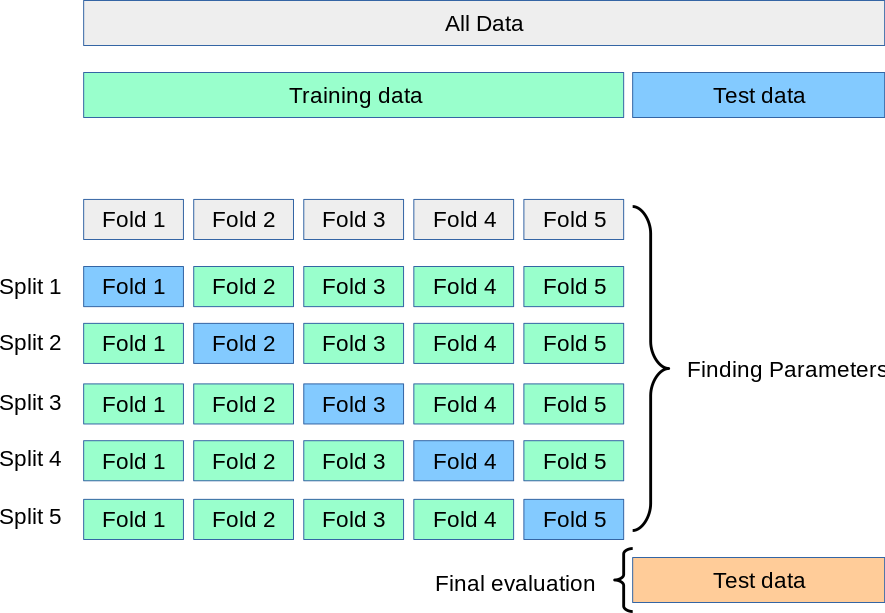

## Random Forest Tuning

In [46]:
# Hyperparameter tuning Random Forest using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Max samples for bootstrapping
max_samples = [0.5, 0.7, 0.8, 1.0]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_samples': max_samples
}

# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor(random_state=99)

# Random search of parameters, using 3 fold cross validation,
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=200,
                               cv=3,
                               random_state=99,
                               n_jobs=-1)


In [47]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=99),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_samples': [0.5, 0.7, 0.8, 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=99)

In [48]:
results_rf_random = pd.DataFrame(rf_random.cv_results_)
results_rf_random.sort_values(by='rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_samples,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,3.925734,0.018387,0.246686,0.004190,1000,5,1,1.0,log2,9,"{'n_estimators': 1000, 'min_samples_split': 5,...",0.796257,0.807522,0.756516,0.786765,0.021878,1
10,0.442767,0.006221,0.028865,0.004347,100,2,1,1.0,sqrt,10,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.796269,0.806800,0.754989,0.786019,0.022359,2


In [49]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 'log2',
 'max_depth': 9}

In [50]:
rf_random.best_score_

0.7867647482379466

In [51]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=9, max_features='log2', max_samples=1.0,
                      min_samples_split=5, n_estimators=1000, random_state=99)

In [52]:
# Evaluate the Random Forest model with the best hyperparameters
y_pred_rf_random = rf_random.best_estimator_.predict(X_test)

r2_rf_random = r2_score(y_test, y_pred_rf_random)
mae_rf_random = mean_absolute_error(y_test, y_pred_rf_random)
mape_rf_random = mean_absolute_percentage_error(y_test, y_pred_rf_random)
rmse_rf_random = mean_squared_error(y_test, y_pred_rf_random, squared=False)

df_forest_tune = pd.DataFrame({'Random Forest RandomizedSearchCV': [r2_rf_random, mae_rf_random, mape_rf_random, rmse_rf_random]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_forest_tune

,Random Forest RandomizedSearchCV
R^2,0.819379
MAE,34966.132851
MAPE,0.193297
RMSE,42977.042072


## Decision Tree Tuning

In [53]:
# Decision Tree Hyperparameter Tuning

# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Use the random grid to search for best hyperparameters

# First create the base model to tune
tree = DecisionTreeRegressor(random_state=99)

# Random search of parameters, using 3 fold cross validation,
# search across 200 different combinations, and use all available cores
tree_random = RandomizedSearchCV(estimator=tree,
                               param_distributions=random_grid,
                               n_iter=200,
                               cv=3,
                               random_state=99,
                               n_jobs=-1)

In [54]:
tree_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=99),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=99)

In [55]:
results_tree_random = pd.DataFrame(tree_random.cv_results_)
results_tree_random.sort_values(by='rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
175,0.010419,0.014734,0.00521,0.007369,2,1,log2,10,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.799384,0.806502,0.75886,0.788249,0.020983,1
95,0.020838,0.007367,0.00000,0.000000,2,1,sqrt,10,"{'min_samples_split': 2, 'min_samples_leaf': 1...",0.799384,0.806502,0.75886,0.788249,0.020983,1


In [56]:
tree_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [57]:
tree_random.best_score_

0.7882485710954009

In [58]:
tree_random.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features='sqrt', random_state=99)

In [59]:
y_pred_tree_random = tree_random.predict(X_test)

r2_tree_random = r2_score(y_test, y_pred_tree_random)
mae_tree_random = mean_absolute_error(y_test, y_pred_tree_random)
mape_tree_random = mean_absolute_percentage_error(y_test, y_pred_tree_random)
rmse_tree_random = mean_squared_error(y_test, y_pred_tree_random, squared=False)

df_tree_tune = pd.DataFrame({'Decision Tree RandomizedSearchCV': [r2_tree_random, mae_tree_random, mape_tree_random, rmse_tree_random]}, index=['R^2', 'MAE', 'MAPE', 'RMSE'])
df_tree_tune


,Decision Tree RandomizedSearchCV
R^2,0.819319
MAE,34879.458423
MAPE,0.191225
RMSE,42984.162292


# **Compare Test Set Evaluation Metrics Before and After Tune**

In [60]:
# Random Forest
df_forest_compare = pd.concat([df_forest_base, df_forest_tune], axis=1)
df_forest_compare

,Random Forest,Random Forest RandomizedSearchCV
R^2,0.816057,0.819379
MAE,35100.191186,34966.132851
MAPE,0.194029,0.193297
RMSE,43370.406742,42977.042072


In [61]:
# Decision Tree
df_tree_compare = pd.concat([df_tree_base, df_tree_tune], axis=1)
df_tree_compare

,Decision Tree,Decision Tree RandomizedSearchCV
R^2,0.812067,0.819319
MAE,35164.103715,34879.458423
MAPE,0.194253,0.191225
RMSE,43838.302998,42984.162292


- After performing hyper parameter tuning, the model using the Random Forest algorithm was selected because it had a higher R-Squared value (**0.819379**) than the Decision Tree (**0.819319**).
- Random forests are generally more accurate than individual decision trees because they combine multiple trees and reduce overfitting, providing better predictive performance and robustness.
- However, both Random Forest and Decision Tree experienced increases in all aspects of Evaluation Metrics after hyper parameter tuning was carried out.

# **Final Model (Random Forest)**

## Definition (How it Work)
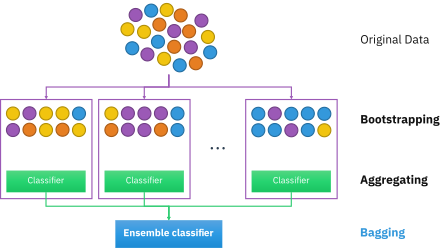

### Ensemble Method
- Ensemble learning is a technique that combines predictions from multiple machine learning algorithms to produce predictions that are more accurate than any individual model.In simple words, an ensemble model is one that comprises of many models. There are many ensemble techniques like Stacking, Bagging, Boosting, etc.

### Bagging (Bootstrap Aggregating)
- Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, this technique is also referred to as Bagging. In this technique a generalized result is obtained by combining the results of various predictive models. It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example, **`Random Forest`**. Here are the steps involved in Bagging:

    1. **Selection of Subset**: Bagging starts by choosing a random sample, or subset, from the entire dataset.
    2. **Bootstrap Sampling**: Each model is then created from these samples, called Bootstrap Samples, which are taken from the original data with replacement. This process is known as row sampling.
    3. **Independent Model Training**: Each model is trained independently on its corresponding Bootstrap Sample. This training process generates results for each model.
    4. **Majority Voting**: The final output is determined by combining the results of all models through majority voting. The most commonly predicted outcome among the models is selected.
    5. **Aggregation**: This step, which involves combining all the results and generating the final output based on majority voting, is known as aggregation.
    
### Steps Involved in Random Forest Algorithm
- **Step 1**: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n-random records and m-features are taken from the data set having k-number of records.
- **Step 2**: Individual decision trees are constructed for each sample.
- **Step 3**: Each decision tree will generate an output.
- **Step 4**: Final output is considered based on Majority Voting or Averaging for Classification and Regression, respectively.

In simple terms, **`Random Forest is a collection of prediction results from several Decision Trees`**. So it can be said that the prediction results from Random Forest will be **more robust and accurate** when compared to the prediction results from a single Decision Tree.

## Model Limitation

In [62]:
# Min and Max values of Every Feature
min_values = df_no_outliers.min()
max_values = df_no_outliers.max()

min_max_values = pd.concat([min_values, max_values], axis=1)
min_max_values.columns = ['Min', 'Max']
min_max_values


,Min,Max
HallwayType,corridor,terraced
TimeToSubway,0-5min,no_bus_stop_nearby
SubwayStation,Bangoge,no_subway_nearby
N_FacilitiesNearBy(ETC),0.0,5.0
N_FacilitiesNearBy(PublicOffice),0.0,7.0
N_SchoolNearBy(University),0.0,5.0
N_Parkinglot(Basement),0.0,1321.0
YearBuilt,1978,2015
N_FacilitiesInApt,1,10
Size(sqf),135,1796


- The predictions of this model are limited by the minimum and maximum values of the features used in building this ML model. For example, the minimum value of the apartment area variable (Size(sqf)) is 135 and the maximum value is 1796. Although you can predict beyond the maximum and minimum values, the results will not be as accurate as if you estimate within the minimum and maximum limits.
- Likewise with categorical variables, the model can only predict categories that have been studied by the model (for example: HallwayType & SubwayStation variables). If there is new data outside of the existing categories in the training dataset, then the model will produce biased predictions.
- So it can be concluded that the accuracy of this model in predicting prices is very limited by the dataset used when training.

Notes:
- This model can only predict apartment prices in Daegu city, and cannot be used as a benchmark for prices in other areas.
- This model only uses data at one time, it cannot forecast prices in the future, because there could be changes in trends at times in the future.
- This model only considers the features in the dataset and cannot capture phenomena outside of the existing features, especially social, cultural and governmental factors.

## Model Parameter Tuning

- **n_estimators**: 1000,
- **min_samples_split**: 5,
- **min_samples_leaf**: 1,
- **max_samples**: 1.0,
- **max_features**: 'log2',
- **max_depth**: 9

In general, the parameters that can be set in Random Forest are the same as the parameters used in Decision trees (maximum depth, minimum sample separation, minimum leaf samples, and so on), because the basis of Random Forest itself is a collection of several Decisions Tree. Some additional parameters used in Random Forest are:
- **N-Estimator**: Number of trees in the forest. More trees usually provide stronger predictions.
- **Max Samples**: In random forests we usually use Bootstrap. Bootstrapping is a statistical resampling technique that involves taking random samples from a data set with replacement. So Max Sample is the number of samples taken from X_train to train each base estimator.

## Model Evaluation Metrics

In [63]:
df_forest_tune

,Random Forest RandomizedSearchCV
R^2,0.819379
MAE,34966.132851
MAPE,0.193297
RMSE,42977.042072


These are metrics used to evaluate the performance of Random Forest Regressor model in predicting apartment prices in Korean Won (₩). Here's how to interpret them:

1. **R^2 (Coefficient of Determination)**: This is 0.819379, which means that approximately **`81.94%`** of the variability in the apartment prices can be explained by the features in the model. This is a relatively high R^2, suggesting that the model explains a large portion of the variation in apartment prices & the model provides a reasonably good fit to the data.

2. **MAE (Mean Absolute Error)**: This is **`34,966.132851`**, which means that on average, your model's predictions are about ₩34,966.13 off from the actual apartment prices. This gives you an idea of the magnitude of the errors the model is making.

3. **MAPE (Mean Absolute Percentage Error)**: This is 0.193297, or **`19.33%`**. This means that on average, your model's predictions are about 19.33% off from the actual apartment prices. This gives you a relative measure of the errors the model is making.

4. **RMSE (Root Mean Square Error)**: This is **`42,977.042072`**, which is a measure of the differences between the values predicted by the model and the values actually observed. It's more sensitive to large errors (Outliers) than MAE because it squares the differences before averaging them. The RMSE being larger than the MAE suggests that your model is occasionally making large errors.

**Notes:**
- The MAE and the RMSE can be used together to diagnose the variation in the errors in a set of forecasts. The RMSE will always be larger or equal to the MAE; the greater difference between them, the greater the variance in the individual errors in the sample. If the RMSE=MAE, then all the errors are of the same magnitude **`(₩42,977.04 - ₩34,966.13 = ₩8,010.91 => The difference between MAE and RMSE is not too big, meaning that it can be said that the variance error in the prediction results is not too big.)`**
- Overall, these metrics suggest that the model is doing a reasonably good job of predicting apartment prices in Korean Won, but there is still room for improvement, particularly in reducing the size of the errors.

## Feature Importances

In [64]:
rf_random.best_estimator_.feature_importances_

array([0.28779583, 0.05983204, 0.03422983, 0.01972836, 0.0864587 ,
       0.07725742, 0.03745469, 0.0129031 , 0.14618962, 0.00211741,
       0.00593249, 0.00137146, 0.00121453, 0.00771586, 0.00290039,
       0.00546137, 0.00195771, 0.08958742, 0.11989178])

In [65]:
# Create a dataframe for feature importances
df_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_random.best_estimator_.feature_importances_
})

df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

df_feature_importances

,Feature,Importance
0,Size(sqf),0.287796
8,HallwayType_terraced,0.146190
18,YearBuilt,0.119892
17,TimeToSubway,0.089587
4,N_Parkinglot(Basement),0.086459
5,N_FacilitiesInApt,0.077257
1,N_FacilitiesNearBy(ETC),0.059832
6,HallwayType_corridor,0.037455
2,N_FacilitiesNearBy(PublicOffice),0.034230
3,N_SchoolNearBy(University),0.019728


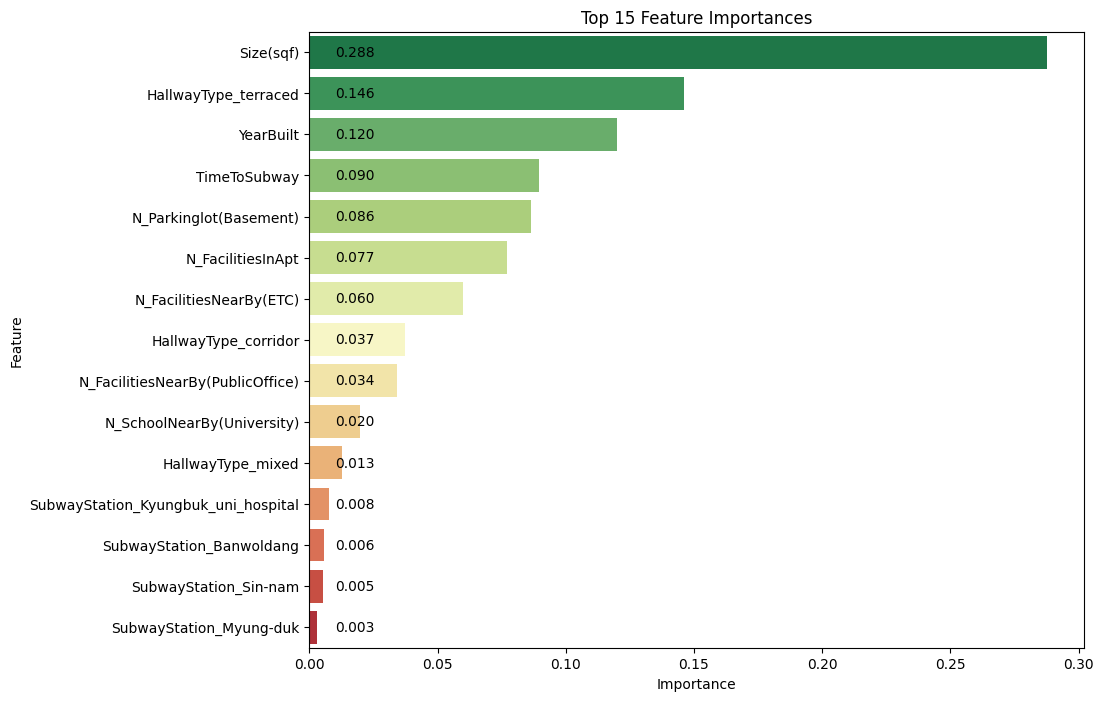

In [66]:
# Plot the feature importances top 15
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances.head(15), palette='RdYlGn_r')
plt.title('Top 15 Feature Importances')

#annotate
for i in range(15):
    plt.text(0.01, i, f'{df_feature_importances["Importance"].values[i]:.3f}', va='center')

plt.show()

These are the feature importances from the Random Forest model, which indicate how much each feature contributes to the predictions of the model.

- **Size(sqf)**: This is the most important feature in your model, with an importance score of `0.287796`. This means that the size of the property (in square feet) is the most significant factor in predicting the target variable, which is the price of the apartment.

- **HallwayType_terraced**: This feature has the second highest importance score `(0.146190)`. This suggests that whether the hallway type is terraced or not is the second most important factor in this model. It seems that the type of hallway has a significant impact on the price of the apartment.

- **YearBuilt**: This feature has the third highest importance score `(0.119892)`. This suggests that the year the property was built is the third most important factor in this model. Newer apartments might be priced higher than older ones.

- **TimeToSubway**: This feature has an importance score of `0.089587`, making it the fourth most important feature. This suggests that the time it takes to get to the subway from the property is a significant factor in this model. Properties closer to the subway might be priced higher.

- **N_Parkinglot(Basement)**: This feature has an importance score of `0.086459`. This suggests that the number of parking lots in the basement of the property is a significant factor in this model. Properties with more parking spaces might be priced higher.

- and so on.

**Notes:**

Feature importance doesn't imply causality, it just tells us which features are most influential in the model's predictions. Also, the importance of a feature depends on the specific model and could change if you use a different model or change the model parameters.

# **Conclusion and Recommendation**

## **Conclusion**

- After rigorous analysis and hyperparameter tuning, the Random Forest model emerged as the most suitable algorithm for predicting apartment prices in Daegu city, achieving an impressive R^2 value of 0.819379. This indicates that approximately 81.94% of the variability in apartment prices can be explained by the features included in the model. While both Random Forest and Decision Tree models experienced enhancements post-tuning, the former exhibited slightly superior performance.

- However, it's important to acknowledge the limitations of the model. Predictions are constrained by the range and categories of features within the training dataset. Notably, the model's accuracy is bounded by the minimum and maximum values of features like apartment area, and it can only predict within the confines of the studied categories (e.g., hallway types, subway stations). Thus, while the model offers valuable insights for pricing apartments in Daegu, it cannot be extrapolated to other regions or forecast future price trends.

## **Recommendations For Further Analysis**

- **Data Expansion**: To enhance predictive accuracy, augment the dataset with additional features that significantly influence apartment prices, such as property amenities, neighborhood characteristics, and economic indicators.

- **Feature Engineering**: Develop new features or transformations that capture nuanced relationships between existing variables. For instance, consider creating composite features like the ratio of apartment size to the number of parking lots to better capture value propositions.

- **Continued Model Refinement**: Persist in refining the model through ongoing hyperparameter tuning, experimenting with alternative algorithms, and exploring ensemble techniques to further enhance predictive performance.

## **Measurable Implementation:**

To measure the success of these recommendations, you could track metrics such as:

- **Model Performance**: Monitor the model's R^2, MAE, MAPE, and RMSE over time. The goal is to increase the R^2 and decrease the error metrics. If the model's performance decreases, it may be necessary to retrain the model with new data.
- **User Satisfaction**: Conduct surveys to gauge user satisfaction with the price predictions. The goal is to increase user satisfaction scores.
- **Data-Driven Development**: Property builders and developers can use model data to determine which features should be prioritized in development projects, based on current market preferences & also formulate marketing strategies targeting property features that significantly influence the sales price.
- **Business Impact**: Track the impact of the model on business outcomes, such as the number of properties sold and the average selling price. The goal is to increase the number of properties sold and the average selling price.